In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
data = pd.read_csv('./dataset/play_tennis.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes


In [4]:
df['PlayTennis'] = df['PlayTennis'].map({'Yes': 1, 'No': 0})
y = df['PlayTennis']

X = df.drop(columns=['PlayTennis'])
X = pd.get_dummies(X, drop_first=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

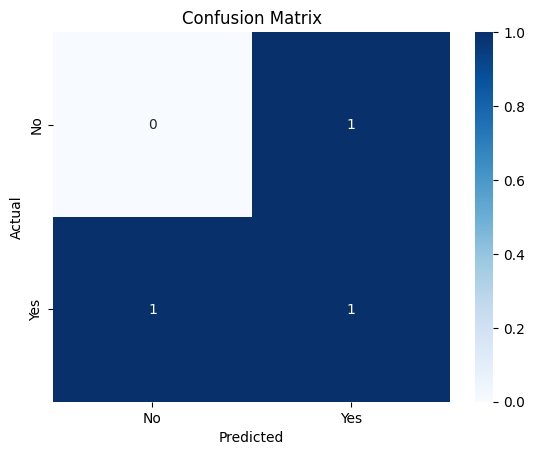

In [7]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

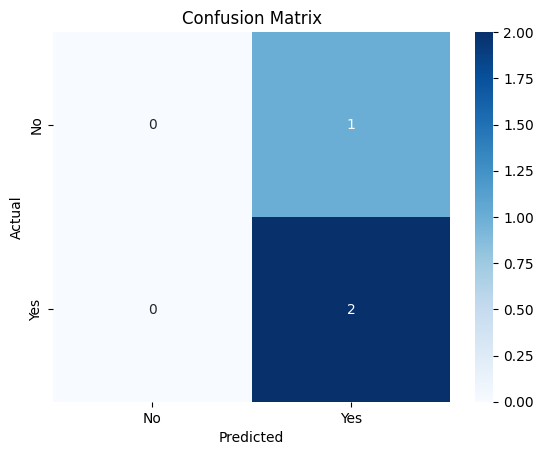

In [8]:
X = df[['Outlook','Temperature']]
X = pd.get_dummies(X, drop_first=True)
y = df['PlayTennis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CategoricalNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
X

,Outlook_Rainy,Outlook_Sunny,Temperature_Hot,Temperature_Mild
0,False,True,True,False
1,False,True,True,False
2,False,False,True,False
3,True,False,False,True
4,True,False,False,False
5,True,False,False,False
6,False,False,False,False
7,False,True,False,True
8,False,True,False,False
9,True,False,False,True


C:\Python\Python3.11\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


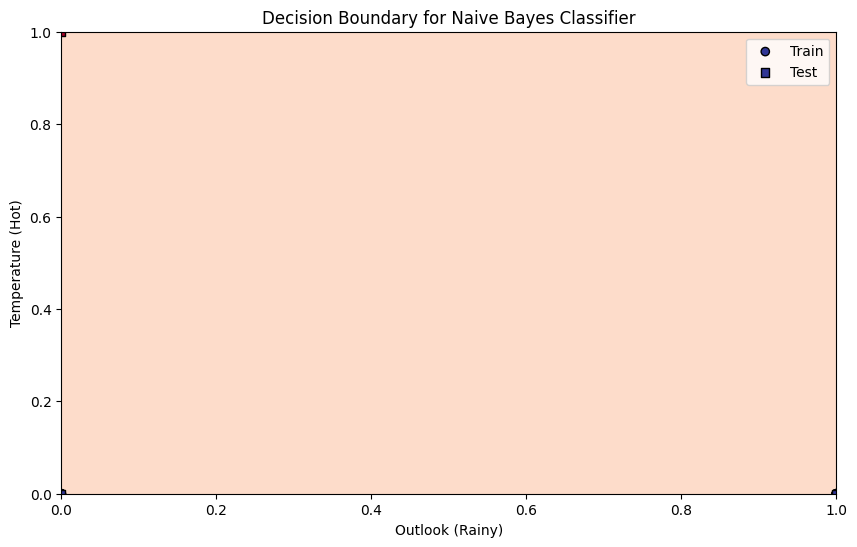

In [15]:
# Prepare to visualize the decision boundary using two features: 'Outlook_Rainy' and 'Temperature_Hot'
x1_range = np.linspace(X['Outlook_Rainy'].min(), X['Outlook_Rainy'].max(), 100)
x2_range = np.linspace(X['Temperature_Hot'].min(), X['Temperature_Hot'].max(), 100)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = np.c_[xx1.ravel(), xx2.ravel(), np.zeros_like(xx1.ravel()), np.zeros_like(xx1.ravel())]

# Predict the class labels for each point in the grid
predictions = model.predict(grid)
predictions = predictions.reshape(xx1.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx1, xx2, predictions, alpha=0.3, cmap='RdYlBu')

# Plot the training points using the selected features
plt.scatter(X_train['Outlook_Rainy'], X_train['Temperature_Hot'], c=y_train, edgecolor='k', cmap='RdYlBu', marker='o', label='Train')
plt.scatter(X_test['Outlook_Rainy'], X_test['Temperature_Hot'], c=y_test, edgecolor='k', cmap='RdYlBu', marker='s', label='Test')

# Label the axes and add a title
plt.xlabel('Outlook (Rainy)')
plt.ylabel('Temperature (Hot)')
plt.title('Decision Boundary for Naive Bayes Classifier')
plt.legend()
plt.show()